In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import datetime
import time
import tensorflow as tf
import tensorflow as tf
import keras
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout,Flatten,Activation,Conv2D,MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
from keras.optimizers import Adam

from google.colab import drive 
drive.mount('/mntDrive')



DATADIR="/mntDrive/My Drive/DataSet/kvasir-dataset-v2"
CATEGORIES =["dyed-lifted-polyps","dyed-resection-margins","esophagitis","normal-cecum","normal-pylorus","normal-z-line","polyps","ulcerative-colitis"]  

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /mntDrive


In [0]:


# tf.test.gpu_device_name()
# --NotebookApp.iopub_data_rate_limit=10000000


In [2]:
IMG_SIZE=200
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                
            except Exception as e:
                pass
    print(len(training_data))
 

create_training_data()
        


8000


In [0]:
random.shuffle(training_data)
# print(training_data)


In [0]:
X=[]
y=[]
for features,lables in training_data:
    X.append(features)
    y.append(lables)
X=np.array(X).reshape(len(X),IMG_SIZE,IMG_SIZE,3)

# print(y)

In [0]:
# pickle_out=open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out=open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()



In [0]:
# pickle_in=open("X.pickle","rb")
# X=pickle.load(pickle_in)
# X.shape

In [0]:
X=X/255.0

In [6]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(2048))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("softmax"))

Name="Cats_and_dogs_2_k-{}".format(int(time.time()))
# tensorboard= TensorBoard(log_dir="logs/{}".format(Name))
# from keras.optimizers import Adam
# op=Adam(lr=0.0001)
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X,y=y,batch_size=32,epochs=20,validation_split=0.3)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 74s 13ms/sample - loss: 1.5732 - acc: 0.5414 - val_loss: 0.8547 - val_acc: 0.6121
Epoch 2/20
5600/5600 [==============================] - 70s 12ms/sample - loss: 0.7486 - acc: 0.6545 - val_loss: 0.7216 - val_acc: 0.6650
Epoch 3/20
5600/5600 [==============================] - 70s 13ms/sample - loss: 0.6212 - acc: 0.7155 - val_loss: 0.7042 - val_acc: 0.6975
Epoch 4/20
5600/5600 [==============================] - 70s 13ms/sample - loss: 0.5017 - acc: 0.7812 - val_loss: 0.7484 - val_acc: 0.6942
Epoch 5/20
5600/5600 [==============================] - 70s 13ms/sample - loss: 0.3720 - acc: 0.8413 - val_loss: 0.9255 - val_acc: 0.6508
Epoch 6/20
5600/5600 [==============================] - 70s 13ms/sample - loss: 0.2636 - acc: 0.8875 - val_loss: 1.0260 - val_acc: 0.6883
Epoch 

Actual value : 7,   Actual symptom : ulcerative-colitis
predicted value : 7,  predicted symptom : ulcerative-colitis


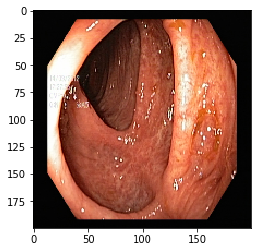

In [26]:
image_index = 2000

# print(training_data[image_index][1])

a=training_data[image_index][0]
pred = model.predict(X[image_index].reshape(1,IMG_SIZE,IMG_SIZE, 3))
# img_array = cv2.imread(X[image_index][0][0],cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

# print(pred)
# 
print(f"Actual value : {training_data[image_index][1]},   Actual symptom : {CATEGORIES[training_data[image_index][1]]}")
print(f"predicted value : {pred.argmax()},  predicted symptom : {CATEGORIES[pred.argmax()]}")
# # print(pred.shape)

# # print(type(x_test[image_index]))
# print(f" Predicted category {CATEGORIES[np.argmax(pred)]}")

In [0]:
model.save('medical_123.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model


# model = load_model('my_model.h5')